In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
%cd /content/drive/MyDrive/Internship Tasks

/content/drive/MyDrive/Internship Tasks


In [64]:
!git clone https://github.com/Zayaad-Wajid/Sentiment-Analysis-on-IMDb-Reviews.git

Cloning into 'Sentiment-Analysis-on-IMDb-Reviews'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [69]:
!git config --global user.email "zayaadw@example.com"
!git config --global user.name "Zayaad-Wajid"

In [84]:
!git add .

In [85]:
!git commit -m "Added Sentiment Analysis Notebook"

[main ed6d9fb] Added Sentiment Analysis Notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Sentiment_Analysis_on_IMDb_Reviews.ipynb


In [ ]:
!pip install pandas nltk scikit-learn

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
import re
stop_words = set(stopwords.words('english'))

def preprocess(text):
  text = text.lower()
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-z\s]', '', text)
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

data['cleaned_review'] = data['review'].apply(preprocess)

In [ ]:
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8874
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix: [[4328  633]
 [ 493 4546]]


Bonus Tasks

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
positive_reviews = data[data['sentiment'] == 1]['cleaned_review']
negative_reviews = data[data['sentiment'] == 0]['cleaned_review']

positive_words = ' '.join(positive_reviews.tolist()).split()
negative_words = ' '.join(negative_reviews.tolist()).split()

positive_word_count = Counter(positive_words).most_common(25)
negative_word_count = Counter(negative_words).most_common(25)

data_positive = pd.DataFrame(positive_word_count, columns=['word', 'count'])
data_negative = pd.DataFrame(negative_word_count, columns=['word', 'count'])


/tmp/ipython-input-62-2234768095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data_positive, x = 'word', y = 'count', palette='Greens')


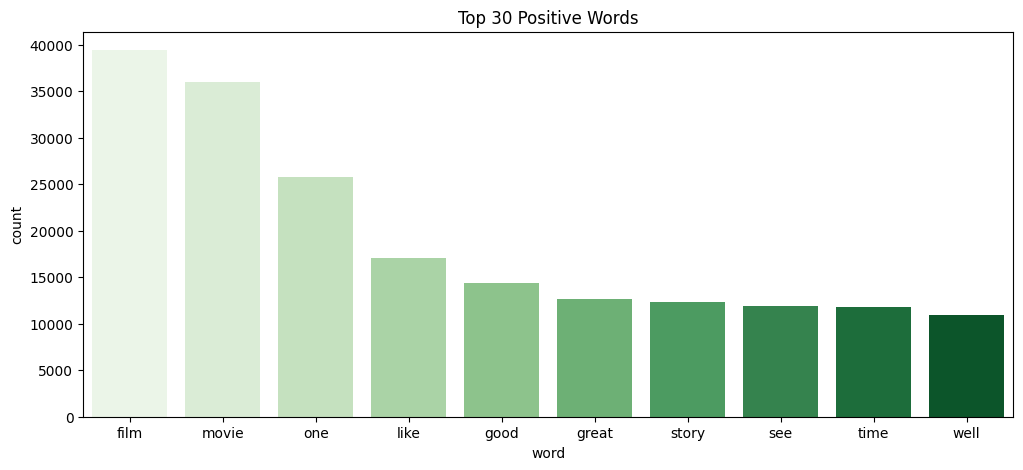

In [ ]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data_positive, x = 'word', y = 'count', palette='Greens')
plt.title('Top 30 Positive Words')
plt.show()


/tmp/ipython-input-63-2602259282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data_negative, x = 'word', y = 'count', palette='Reds')


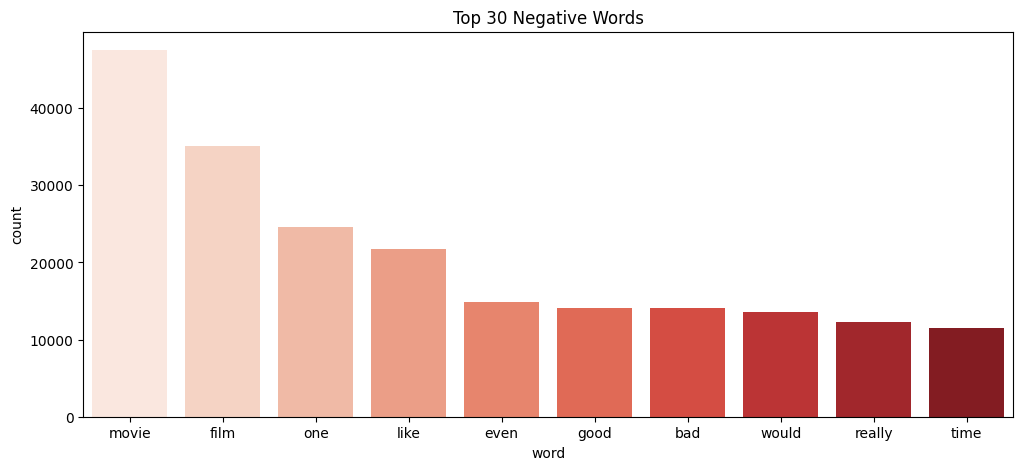

In [ ]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data_negative, x = 'word', y = 'count', palette='Reds')
plt.title('Top 30 Negative Words')
plt.show()